In [688]:
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib inline
import os
os.chdir("C:/Users/srujanat/Desktop/CS109/Udacity/Titanic Survival data Exploration")
full_data=pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [689]:
import visuals as vs

In [690]:
outcomes=full_data['Survived']
data=full_data.drop('Survived', axis=1)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [691]:
def accuracy_score(truth, pred):
    if len(truth)==len(pred):
        return "Predictions have an accuracy of {:.2f}%".format((truth==pred).mean()*100)
    else:
        return "Number of predictions do not mtach number of outcomes!"
predictions = pd.Series(np.ones(5, dtype = int))
print (accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%


# Question 1
Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?
Hint: Run the code cell below to see the accuracy of this prediction.

In [692]:
def predictions_0(data):

    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_0(data)


In [693]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%


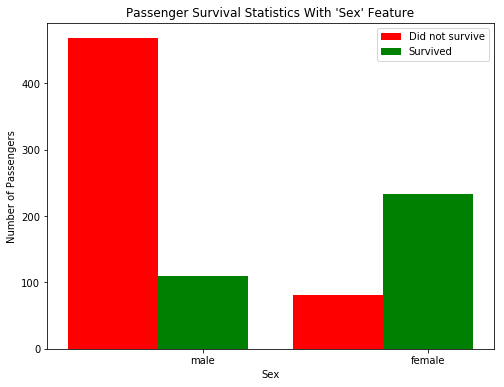

In [694]:
vs.survival_stats(data, outcomes, 'Sex')

# Question 2
How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?
Hint: Run the code cell below to see the accuracy of this prediction.

In [695]:
def predictions_1(data):
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex']=='female':
            predictions.append(1)
        else:
            predictions.append(0)
       
    return pd.Series(predictions)

predictions = predictions_1(data)

In [696]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%


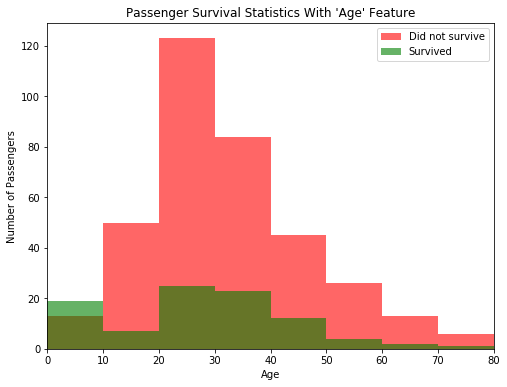

In [697]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

# Question 3
How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?
Hint: Run the code cell below to see the accuracy of this prediction.

In [722]:
def predictions_2(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex']=='female':
            predictions.append(1)
        elif passenger['Sex']=='male' and passenger['Age'] <10:
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)


predictions = predictions_2(data)

In [723]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%


# Question 4
Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?
Hint: Run the code cell below to see the accuracy of your predictions

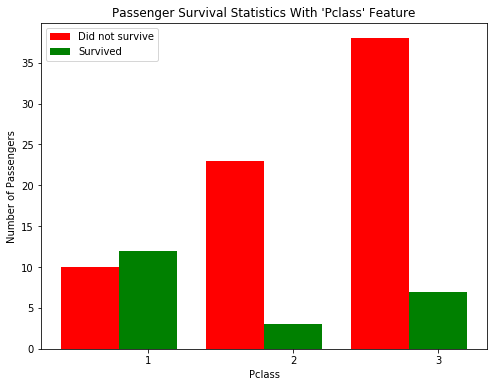

In [700]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'male'", "Age > 30", "Age < 40"])

In [701]:
def predictions_3(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex']=='female':
            predictions.append(1)
        elif  passenger['Sex']=='male' and passenger['Age'] <10:
            predictions.append(1)
        elif passenger['Sex']=='male' and passenger['Age'] > 30 and passenger['Age'] <40 and passenger['Pclass'] == 1 :
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)


predictions = predictions_3(data)

In [702]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.57%


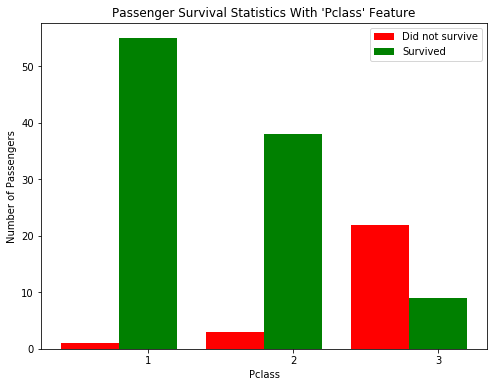

In [703]:
vs.survival_stats(data, outcomes, 'Pclass',["Sex == 'female'", "Age > 27" ])

In [704]:
def predictions_4(data):
    
    predictions = []
    for _, passenger in data.iterrows():

        if passenger['Sex']=='female':
            if (passenger['Age'] > 27)  and (passenger['Pclass'] == 3):
                predictions.append(0)
            else:
                predictions.append(1)
            
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            elif (30 < passenger['Age'] < 40) and passenger['Pclass'] == 1 :
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)


predictions = predictions_4(data)

In [705]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 81.03%


# Note
Although accuracy reached 80%, I just want to test other variables

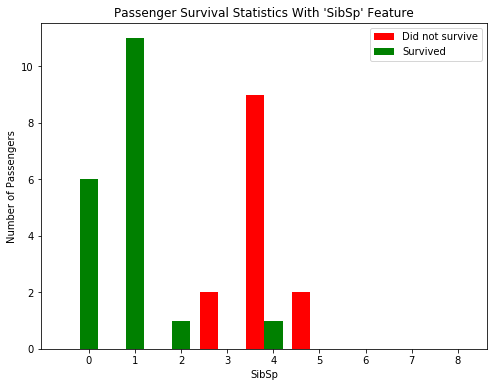

In [720]:
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'male'","Age < 10"])

In [717]:
def predictions_5(data):
    
    predictions = []
    for _, passenger in data.iterrows():

        if passenger['Sex']=='female':
            if (passenger['Age'] > 27)  and (passenger['Pclass'] == 3):
                predictions.append(0)
            else:
                predictions.append(1)
            
        else:
            
            if passenger['Age'] < 10 and passenger['SibSp'] < 3:
                predictions.append(1)
            elif (30 < passenger['Age'] < 40) and passenger['Pclass'] == 1 :
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)


predictions = predictions_5(data)

In [718]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 82.38%


# Steps

# What features did you look at?  - Sex, Age, Pclass, SibSp 

Were certain features more informative than others? - Sex played a major role of all variables as accuracy increased from 61% to 78% by just coding all females to 'Survived'. All other variables increased accuracy by small percentage.

Which conditions did you use to split the survival outcomes in the data?  - 
1. In the intial plot on age, I observed that there are more passengers in the age range 20 - 50. So, I concentrated more in this area

2. I looked at Pclass for age 30 - 40 and found that slightly more survivors are in Pclass=1. However, it increased accuracy very little.

3. Although we initially classified all females as survived, we are misclassifying almost 100 passengers (as observed in first plot). I want to check Pclass by age in females too. Passengers older than 27 years have low survival rate in Pclass=3. Adding this condition increased accuary to 80%

4. Finally I checked effect of SibSp variable on different age ranges.

Accuracy of final model is 82.38%

# Question 5
Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.

I am currently working in Higher education. Most common scenario where supervised learning is applied in this field - 

Predicting students retention rate each year where we try to predict if the student retained or not after first year of college
The common factors involved in this prediction are
 1. High School GPA
 2. Parents annual income and their education
 3. First Year GPA
 4. Test Scores
 5. Scholarships
